## what is pytorch?
    Its open source python-based deep learning library

### Three core components of the PyTorch library:
- 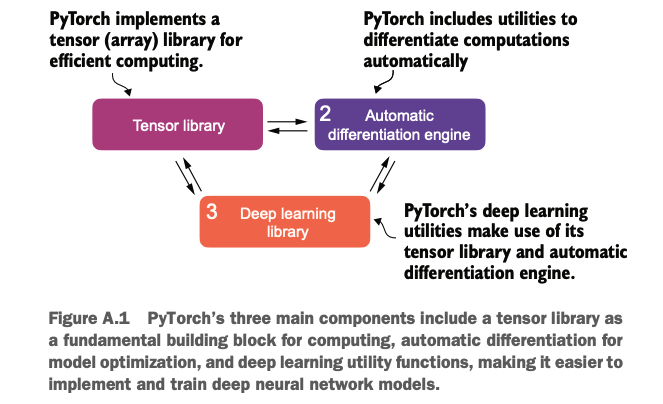

- `tensory library` - array library like numpy but with GPU support, provided seamless switching between CPU and GPU.
- `automatic differentiation engine` - called Autograd, which automatically computes gradients for tensor operations, enabling efficient backpropagation and model optimization.
- `deep learning library` - offers modular, flexible and efficient building blocks including pretrained models, loss functions, and optimizers, for designing and training a wide range of deep learning models, catering to both researchers and developers.


## what is deep learning?
- Machine learning represents a subfield of AI that focuses on developement and improving learning algorithms, the core idea behind the machine learning is to ebable computers to learn from data and make predictions or decisions without being explicitly programmed to perform a specific task. This involves creating the algorithms that can identify patterns in data, learn from historical data, and improve their performance over time with more data and feedback.
- Machine learning is also behind technologies like recommendation systems used by online retailers and streaming services, email spam filtering, voice recognition in virtual assistants, and even self-driving cars.

- Deep learning is a subcategory of machine learning that focuses on the training and application of deep neural networks.
- The “deep” in deep learning refers to the multiple hidden layers of artificial neurons or nodes that allow them to model complex, nonlinear relationships in the data. Unlike traditional machine learning techniques that excel at simple pattern recognition, deep learning is particularly good at handling unstructured data
like images, audio, or text, so it is particularly well suited for LLMs.

In [ ]:
pip install torch==2.4.0 # type: ignore

In [3]:
# checking the torch version, in my conda i installed using pip install torch==2.4.0 command 
import torch
torch.__version__

'2.4.0'

In [5]:
# with below command checking if my mac has mps (metal performance shader) support for GPU acceleration - we need this if dont have then try using google colab (mentinod in the book)
print(torch.backends.mps.is_available())

True


## creating pytorch tensors
- Tensors are the fundamental data structure in PyTorch, similar to arrays or matrices in other programming languages. 
- They are multi-dimensional arrays that can be processed on both CPUs and GPUs, making them highly efficient for numerical computations.
- In this section, we will explore how to create and manipulate tensors in PyTorch.

In [ ]:
import torch

tensor0d = torch.tensor(42)  # 0D tensor (scalar)
tensor1d = torch.tensor([1, 2, 3])  # 1D tensor (vector)
tensor2d = torch.tensor([[1, 2], [3, 4]])  # 2D tensor (matrix)  
tensor3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])  # 3D tensor (cube)

print("3D Tensor:\n", tensor3d.shape)   # output: torch.Size([2, 2, 2]) while counting do first column and then rows and then inside depth.


3D Tensor:
 torch.Size([2, 2, 2])


In [11]:
print("2D Tensor:", tensor2d)

print("2D Tensor transposed:\n", tensor2d.T)  # Transpose of the 2D tensor
# transpose means converting rows to columns and columns to rows

#print("3D Tensor:", tensor3d)
#print("3D Tensor transposed:\n", tensor3d.T)  # Transpose of the 3D tensor

2D Tensor: tensor([[1, 2],
        [3, 4]])
2D Tensor transposed:
 tensor([[1, 3],
        [2, 4]])


In [13]:
# Tensor matmul example
result = tensor2d.matmul(tensor2d.T)  # Matrix multiplication of 2D tensor with its transpose
print(result)  

# trying new way to matmul using @ operator
result2 = tensor2d @ tensor2d.T
print(result2)

tensor([[ 5, 11],
        [11, 25]])
tensor([[ 5, 11],
        [11, 25]])


In [14]:
import torch.nn.functional as F

y = torch.tensor([1.0])  # true label
x1 = torch.tensor([1.1]) # input feature
w1 = torch.tensor([2.2]) # weight parameter
b = torch.tensor([0.0])  # bias unit

z = x1 * w1 + b          # net input
a = torch.sigmoid(z)     # activation & output

loss = F.binary_cross_entropy(a, y)
print(loss)

tensor(0.0852)


## concept of DataSet and DataLoader in pytorch
- `Dataset` - an abstract class representing a dataset. It provides methods to access individual data. Here are the key points:
  - You can create a custom dataset by subclassing the `Dataset` class and implementing the `__len__` and `__getitem__` methods.
  - `__len__`: Returns the total number of samples in the dataset.
  - `__getitem__`: Retrieves a sample from the dataset at a given index. It needs Source and Target both.
- `DataLoader` - a utility that wraps a Dataset and provides an iterable over the dataset, with support for batching, shuffling, and parallel data loading.

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

class SimpleNumberDataset(Dataset):
    def __init__(self):
        # Imagine this is like your ArrayList<Integer> in Java
        self.numbers = list(range(1, 11))  # [1, 2, 3, ..., 10]
        
    def __len__(self):
        return len(self.numbers)
    
    def __getitem__(self, idx):
        # Simulate some processing - square the number
        number = self.numbers[idx]
        squared = number ** 2
        return number, squared

# Create dataset
dataset = SimpleNumberDataset()

print("=== DATASET DIRECT ACCESS ===")
print(f"Total items: {len(dataset)}")
print(f"dataset[0] = {dataset[0]}")  # Like list.get(0) in Java
print(f"dataset[5] = {dataset[5]}")
print()

# Create DataLoader with batch_size=3
dataloader = DataLoader(dataset, batch_size=3, shuffle=False)

print("=== DATALOADER ITERATION (batch_size=3, shuffle=False) ===")
for batch_idx, (numbers, squares) in enumerate(dataloader):
    print(f"Batch {batch_idx}:")
    print(f"  Numbers: {numbers.tolist()}")
    print(f"  Squares: {squares.tolist()}")

=== DATASET DIRECT ACCESS ===
Total items: 10
dataset[0] = (1, 1)
dataset[5] = (6, 36)

=== DATALOADER ITERATION (batch_size=3, shuffle=False) ===
Batch 0:
  Numbers: [1, 2, 3]
  Squares: [1, 4, 9]
Batch 1:
  Numbers: [4, 5, 6]
  Squares: [16, 25, 36]
Batch 2:
  Numbers: [7, 8, 9]
  Squares: [49, 64, 81]
Batch 3:
  Numbers: [10]
  Squares: [100]


### Text Dataset (NLP Example)

In [22]:
class TextDataset(Dataset):
    def __init__(self):
        # Simulating text data with labels
        self.texts = [
            "I love programming",
            "Python is great",
            "Machine learning is fun",
            "I hate bugs",
            "Debugging is frustrating",
            "Errors are annoying"
        ]
        self.labels = [1, 1, 1, 0, 0, 0]  # 1=positive, 0=negative
        
        # Simple vocabulary (in real case, you'd use tokenizers)
        # If you are from java background consider this as a HashMap<String, Integer>
        self.vocab = {word: idx for idx, word in enumerate(
            set(' '.join(self.texts).split())
        )}
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        
        # Convert text to token indices (like StringTokenizer in Java)
        tokens = [self.vocab[word] for word in text.split()]
        
        return {
            'text': text,
            'tokens': torch.tensor(tokens),
            'label': torch.tensor(label),
            'length': len(tokens)
        }

# Create dataset and dataloader
text_dataset = TextDataset()
text_loader = DataLoader(text_dataset, batch_size=1, shuffle=True)

print("=== TEXT DATASET EXAMPLE ===")
print(f"Vocabulary size: {len(text_dataset.vocab)}")
print(f"Vocabulary: {list(text_dataset.vocab.keys())[:10]}...")  # First 5 words
print(f"Vocabulary: {list(text_dataset.vocab.values())[:10]}...")  # First 5 words
print()

print("=== BATCHED TEXT DATA ===")
for batch_idx, batch in enumerate(text_loader):
    print(f"Batch {batch_idx}:")
    for i in range(len(batch['text'])):
        print(f"  Text: '{batch['text'][i]}'")
        print(f"  Tokens: {batch['tokens'][i].tolist()}")
        print(f"  Label: {batch['label'][i].item()} ({'positive' if batch['label'][i] == 1 else 'negative'})")
    print()
    if batch_idx == 1:  # Show only first 2 batches
        break
    


=== TEXT DATASET EXAMPLE ===
Vocabulary size: 16
Vocabulary: ['bugs', 'Machine', 'I', 'hate', 'frustrating', 'learning', 'are', 'programming', 'annoying', 'Python']...
Vocabulary: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...

=== BATCHED TEXT DATA ===
Batch 0:
  Text: 'Python is great'
  Tokens: [9, 14, 12]
  Label: 1 (positive)

Batch 1:
  Text: 'I hate bugs'
  Tokens: [2, 3, 0]
  Label: 0 (negative)



#### Example : Custom Dataset with Multiple Return Types

In [ ]:
class StudentRecordDataset(Dataset):
    """
    Like a Java class that holds Student records
    """
    def __init__(self):
        self.students = [
            {'id': 1, 'name': 'Alice', 'scores': [85, 90, 88], 'passed': True},
            {'id': 2, 'name': 'Bob', 'scores': [70, 65, 72], 'passed': False},
            {'id': 3, 'name': 'Charlie', 'scores': [95, 92, 96], 'passed': True},
            {'id': 4, 'name': 'Diana', 'scores': [88, 85, 90], 'passed': True},
            {'id': 5, 'name': 'Eve', 'scores': [60, 58, 65], 'passed': False},
        ]
    
    def __len__(self):
        return len(self.students)
    
    def __getitem__(self, idx):
        student = self.students[idx]
        
        # Return multiple pieces of information
        return {
            'id': torch.tensor(student['id']),
            'scores': torch.tensor(student['scores'], dtype=torch.float32),
            'avg_score': torch.tensor(sum(student['scores']) / len(student['scores'])),
            'passed': torch.tensor(1.0 if student['passed'] else 0.0),
            'name': student['name']  # Can mix tensors and regular Python objects
        }

# Create dataset and loader
student_dataset = StudentRecordDataset()
student_loader = DataLoader(student_dataset, batch_size=2, shuffle=True)

print("=== STUDENT DATASET ===")
print(f"Total students: {len(student_dataset)}")
print()

print("=== SINGLE STUDENT ACCESS ===")
student_0 = student_dataset[0]
print(f"Student 0 data:")
for key, value in student_0.items():
    print(f"  {key}: {value}")
print()

print("=== BATCHED STUDENT DATA ===")
for batch_idx, batch in enumerate(student_loader):
    print(f"Batch {batch_idx}:")
    print(f"  Names: {batch['name']}")
    print(f"  IDs: {batch['id'].tolist()}")
    print(f"  Scores shape: {batch['scores'].shape}")
    print(f"  Average scores: {batch['avg_score'].tolist()}")
    print(f"  Passed: {batch['passed'].tolist()}")
    print()
    if batch_idx == 1:  # Show first 2 batches
        break

Example : DataLoader Collate Function (Custom Batching)

In [ ]:
class VariableLengthDataset(Dataset):
    def __init__(self):
        # Sentences of different lengths
        self.sentences = [
            "Hello",
            "Hello world",
            "Hello world from PyTorch",
            "Hi"
        ]
    
    def __len__(self):
        return len(self.sentences)
    
    def __getitem__(self, idx):
        words = self.sentences[idx].split()
        return words, len(words)

def custom_collate_fn(batch):
    """
    Custom function to handle variable-length data
    Like a custom Comparator in Java
    """
    sentences, lengths = zip(*batch)
    
    # Sort by length (longest first)
    sorted_data = sorted(zip(sentences, lengths), key=lambda x: x[1], reverse=True)
    sentences, lengths = zip(*sorted_data)
    
    return list(sentences), torch.tensor(lengths)

# Create dataset with custom collate
var_dataset = VariableLengthDataset()
var_loader = DataLoader(
    var_dataset, 
    batch_size=2, 
    shuffle=True,
    collate_fn=custom_collate_fn  # Custom batching logic
)

print("=== VARIABLE LENGTH DATASET WITH CUSTOM COLLATE ===")
for batch_idx, (sentences, lengths) in enumerate(var_loader):
    print(f"Batch {batch_idx} (sorted by length):")
    for sent, length in zip(sentences, lengths):
        print(f"  {sent} (length: {length.item()})")
    print()